Importing libraries

In [1]:
import keras
import time
import numpy as np
import tensorflow as tf
from keras.optimizers import SGD
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from keras.applications.densenet import DenseNet121

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Loading image labels

In [2]:
# loading image label arrays from drive
train_labels = np.load('/content/drive/MyDrive/FER2013/train_labels.npy')
test_labels = np.load('/content/drive/MyDrive/FER2013/test_labels.npy')

print("Training Labels : ",train_labels.shape)
print("Testing  Labels : ",test_labels.shape)

Training Labels :  (28709, 7)
Testing  Labels :  (7080, 7)


Laoding raw image data

In [3]:
# loading raw image arrays from drive
train_data = np.load('/content/drive/MyDrive/FER2013/train_data.npy')
test_data = np.load('/content/drive/MyDrive/FER2013/test_data.npy')

print("Training Data   : ",train_data.shape)
print("Testing  Data   : ",test_data.shape)

Training Data   :  (28709, 224, 224, 3)
Testing  Data   :  (7080, 224, 224, 3)


ResNet50 with Rawdata

In [4]:
# Loading pretrain resnet model
resnet_model = ResNet50(weights='imagenet',include_top=False)

# Pooling/ flat
pooling = keras.layers.GlobalAveragePooling2D()(resnet_model.output)

# Adding fully connected layer 1
pred = keras.layers.Dense(7, activation='softmax', name="pred")(pooling)

# Final model
model = keras.models.Model(inputs = resnet_model.input, outputs=pred)

# Options setting
options = keras.optimizers.SGD(learning_rate = 0.001,decay=1e-6,momentum=0.9)

model.compile(optimizer=options, metrics=["accuracy"],loss='categorical_crossentropy')

# saving the best model 
filepath="/content/drive/MyDrive/FER2013/rawdata_resnet50.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# train the model
history = model.fit(train_data, train_labels, batch_size = 64, epochs = 15, shuffle=True, callbacks = callbacks_list, validation_data=(test_data, test_labels))

94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/15
449/449 [==============================] - 368s 687ms/step - loss: 1.4947 - accuracy: 0.4222 - val_loss: 1.9551 - val_accuracy: 0.2962

Epoch 00001: val_accuracy improved from -inf to 0.29619, saving model to /content/drive/MyDrive/FER2013/temp.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
449/449 [==============================] - 304s 677ms/step - loss: 0.8951 - accuracy: 0.6748 - val_loss: 1.2810 - val_accuracy: 0.5222

Epoch 00002: val_accuracy improved from 0.29619 to 0.52218, saving model to /content/drive/MyDrive/FER2013/temp.hdf5
Epoch 3/15
449/449 [==============================] - 304s 677ms/step - loss: 0.5594 - accuracy: 0.8143 - val_loss: 1.1531 - val_accuracy: 0.6035

Epoch 00003: val_accuracy improved from 0.52218 to 0.60353, saving model to /content/drive/MyDrive/FER2013/temp.hdf5
Epoch 4/15
449/449 [==============================] - 323s 720ms/step - loss: 0.2856 - accuracy: 0.9215 - val_loss: 1.2565 - val_accuracy: 0.6124

Epoch 00004: val_accuracy improved from 0.60353 to 0.61243, saving model to /content/drive/MyDrive/FER2013/temp.hdf5
Epoch 5/15
449/449 [==============================] - 304s 677ms/step - loss: 0.1127 - accuracy: 0.9773 - val_loss: 1.3823 - val_accuracy: 0.6284

Epoch 00005: val_accuracy improved from 0.61243 to 0.62839, s

Accuracy and Loss curve for ResNet50 model

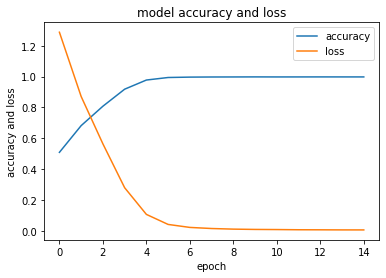

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

VGG16 with Rawdata

In [4]:
vgg_model = VGG16(weights='imagenet',include_top=False)

# Pooling/ flat
pooling = keras.layers.GlobalAveragePooling2D()(vgg_model.output)

# Adding fully connected layer 1
pred = keras.layers.Dense(7, activation='softmax', name="pred")(pooling)

# Final model
model = keras.models.Model(inputs = vgg_model.input, outputs=pred)

# Options setting
options = keras.optimizers.SGD(learning_rate = 0.001,decay=1e-5,momentum=0.9)

model.compile(optimizer=options, metrics=["accuracy"],loss='categorical_crossentropy')

# saving the best model 
filepath="/content/drive/MyDrive/FER2013/rawdata_VGG16.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# train the model
history = model.fit(train_data, train_labels, batch_size = 64, epochs = 15, shuffle=True, callbacks = callbacks_list, validation_data=(test_data, test_labels))

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/15
449/449 [==============================] - 460s 894ms/step - loss: 2.3442 - accuracy: 0.2045 - val_loss: 1.7879 - val_accuracy: 0.2535

Epoch 00001: val_accuracy improved from -inf to 0.25353, saving model to /content/drive/MyDrive/FER2013/rawdata_VGG16.hdf5
Epoch 2/15
449/449 [==============================] - 399s 890ms/step - loss: 1.7577 - accuracy: 0.2736 - val_loss: 1.5779 - val_accuracy: 0.3667

Epoch 00002: val_accuracy improved from 0.25353 to 0.36667, saving model to /content/drive/MyDrive/FER2013/rawdata_VGG16.hdf5
Epoch 3/15
449/449 [==============================] - 404s 900ms/step - loss: 1.5523 - accuracy: 0.3942 - val_loss: 1.3642 - val_accuracy: 0.4886

Epoch 00003: val_accuracy improved from 0.36667 to 0.48856, saving model to /content/drive/MyDrive/FER2013/rawdata_VGG16.hdf5
Epoch 4/15
449/449 [==============================] - 408s 908ms/step - loss: 1.3199 - accuracy: 0.5044 - val_loss: 1.2

Accuracy and Loss curve for VGG16 model

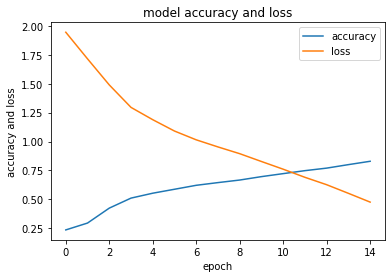

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

DenseNet121 with Rawdata

In [4]:
densenet_model = DenseNet121(weights='imagenet',include_top=False)

# Pooling/ flat
pooling = keras.layers.GlobalAveragePooling2D()(densenet_model.output)

# Adding fully connected layer 1
pred = keras.layers.Dense(7, activation='softmax', name="pred")(pooling)

# Final model
model = keras.models.Model(inputs = densenet_model.input, outputs=pred)

# Options setting
options = keras.optimizers.SGD(learning_rate = 0.001,decay=1e-6,momentum=0.9)

model.compile(optimizer=options, metrics=["accuracy"],loss='categorical_crossentropy')

# saving the best model 
filepath="/content/drive/MyDrive/FER2013/rawdata_dense121.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# train the model
history =  model.fit(train_data, train_labels, batch_size = 64, epochs = 15, shuffle=True, callbacks = callbacks_list, validation_data=(test_data, test_labels))

29097984/29084464 [==============================] - 0s 0us/step
Epoch 1/15
449/449 [==============================] - 423s 771ms/step - loss: 1.5599 - accuracy: 0.4073 - val_loss: 1.1062 - val_accuracy: 0.5739

Epoch 00001: val_accuracy improved from -inf to 0.57387, saving model to /content/drive/MyDrive/FER2013/rawdata_dense121.hdf5
Epoch 2/15
449/449 [==============================] - 333s 742ms/step - loss: 0.9411 - accuracy: 0.6501 - val_loss: 0.9963 - val_accuracy: 0.6316

Epoch 00002: val_accuracy improved from 0.57387 to 0.63164, saving model to /content/drive/MyDrive/FER2013/rawdata_dense121.hdf5
Epoch 3/15
449/449 [==============================] - 333s 742ms/step - loss: 0.7162 - accuracy: 0.7425 - val_loss: 1.0300 - val_accuracy: 0.6329

Epoch 00003: val_accuracy improved from 0.63164 to 0.63291, saving model to /content/drive/MyDrive/FER2013/rawdata_dense121.hdf5
Epoch 4/15
449/449 [==============================] - 333s 742ms/step - loss: 0.5267 - accuracy: 0.8246 - val_

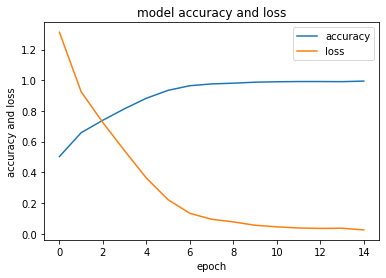

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

Ensemble Learning for Rawdata (ResNet50 + VGG16 + DenseNet121)

In [6]:
from sklearn.metrics import accuracy_score

resnet_model = load_model("/content/drive/MyDrive/FER2013/rawdata_resnet50.hdf5")
vgg_model = load_model("/content/drive/MyDrive/FER2013/rawdata_vgg16.hdf5")
dense_model = load_model("/content/drive/MyDrive/FER2013/rawdata_dense121.hdf5")

raw_dense = dense_model.predict(test_data)
raw_vgg = vgg_model.predict(test_data)
raw_resnet = resnet_model.predict(test_data)

averaged_preds = np.argmax(raw_dense + raw_vgg + raw_resnet, 1)
real_labels = np.argmax(test_labels, 1)
acc = accuracy_score(real_labels, averaged_preds)
print(acc)

0.6956214689265536


Classification report and Confusion Matrix for Raw data

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report :\n")
print(classification_report(real_labels, averaged_preds))

print("Confusion Matrix :\n")
print(confusion_matrix(real_labels, averaged_preds))

Classification Report :

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       860
           1       0.90      0.58      0.70       111
           2       0.56      0.58      0.57      1024
           3       0.86      0.88      0.87      1774
           4       0.63      0.66      0.64      1233
           5       0.59      0.54      0.56      1247
           6       0.83      0.80      0.81       831

    accuracy                           0.70      7080
   macro avg       0.71      0.67      0.68      7080
weighted avg       0.70      0.70      0.69      7080

Confusion Matrix :

[[ 549    2  102   39   83   76    9]
 [  23   64    9    4    3    8    0]
 [  91    3  596   27   88  156   63]
 [  24    0   26 1567   78   45   34]
 [  83    0   82   78  814  158   18]
 [ 123    1  166   63  211  668   15]
 [  22    1   75   38   16   12  667]]


Loading Sobel filter data

In [4]:
# Sobel filtered image arrays
# loading image arrays from drive

train_data = np.load('/content/drive/MyDrive/FER2013/sobel_train.npy')
test_data = np.load('/content/drive/MyDrive/FER2013/sobel_test.npy')

print("Training Data   : ",train_data.shape)
print("Testing  Data   : ",test_data.shape)

Training Data   :  (28709, 224, 224, 3)
Testing  Data   :  (7080, 224, 224, 3)


ResNet50 model with Sobel filtered data

In [4]:
resnet_model = ResNet50(weights='imagenet',include_top=False)

# Pooling/ flat
pooling = keras.layers.GlobalAveragePooling2D()(resnet_model.output)

# Adding fully connected layer 1
pred = keras.layers.Dense(7, activation='softmax', name="pred")(pooling)

# Final model
model = keras.models.Model(inputs = resnet_model.input, outputs=pred)

# Options setting
options = keras.optimizers.SGD(learning_rate = 0.001,decay=1e-6,momentum=0.9)

model.compile(optimizer=options, metrics=["accuracy"],loss='categorical_crossentropy')

# saving the best model 
filepath="/content/drive/MyDrive/FER2013/sobel_filt_resnet50.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# train the model
history = model.fit(train_data, train_labels, batch_size = 64, epochs = 15, shuffle=True, callbacks = callbacks_list, validation_data=(test_data, test_labels))

94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/15
449/449 [==============================] - 375s 694ms/step - loss: 1.5888 - accuracy: 0.3892 - val_loss: 1.1658 - val_accuracy: 0.5528

Epoch 00001: val_accuracy improved from -inf to 0.55282, saving model to /content/drive/MyDrive/FER2013/temp.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
449/449 [==============================] - 308s 687ms/step - loss: 0.9176 - accuracy: 0.6648 - val_loss: 1.1081 - val_accuracy: 0.5912

Epoch 00002: val_accuracy improved from 0.55282 to 0.59124, saving model to /content/drive/MyDrive/FER2013/temp.hdf5
Epoch 3/15
449/449 [==============================] - 309s 688ms/step - loss: 0.5057 - accuracy: 0.8467 - val_loss: 1.2492 - val_accuracy: 0.5891

Epoch 00003: val_accuracy did not improve from 0.59124
Epoch 4/15
449/449 [==============================] - 309s 688ms/step - loss: 0.1855 - accuracy: 0.9614 - val_loss: 1.3943 - val_accuracy: 0.5970

Epoch 00004: val_accuracy improved from 0.59124 to 0.59703, saving model to /content/drive/MyDrive/FER2013/temp.hdf5
Epoch 5/15
449/449 [==============================] - 309s 688ms/step - loss: 0.0544 - accuracy: 0.9944 - val_loss: 1.5320 - val_accuracy: 0.6028

Epoch 00005: val_accuracy improved from 0.59703 to 0.60282, saving model to /content/drive/MyDrive/FER2013/temp.hdf5
Epoch 

Accuracy and Loss curve for ResNet50 model

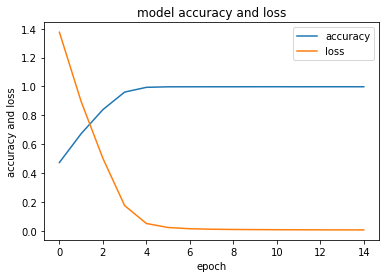

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

VGG16 model with Sobel filtered data

In [5]:
vgg_model = VGG16(weights='imagenet',include_top=False)

# Pooling/ flat
pooling = keras.layers.GlobalAveragePooling2D()(vgg_model.output)

# Adding fully connected layer 1
pred = keras.layers.Dense(7, activation='softmax', name="pred")(pooling)

# Final model
model = keras.models.Model(inputs = vgg_model.input, outputs=pred)

# Options setting
options = keras.optimizers.SGD(learning_rate = 0.001,decay=1e-5,momentum=0.9)

model.compile(optimizer=options, metrics=["accuracy"],loss='categorical_crossentropy')

# saving the best model 
filepath="/content/drive/MyDrive/FER2013/sobel_filt_VGG16.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# train the model
history = model.fit(train_data, train_labels, batch_size = 64, epochs = 15, shuffle=True, callbacks = callbacks_list, validation_data=(test_data, test_labels))

Epoch 1/15
449/449 [==============================] - 482s 941ms/step - loss: 2.0250 - accuracy: 0.2340 - val_loss: 1.7852 - val_accuracy: 0.2819

Epoch 00001: val_accuracy improved from -inf to 0.28192, saving model to /content/drive/MyDrive/FER2013/temp.hdf5
Epoch 2/15
449/449 [==============================] - 416s 926ms/step - loss: 1.7398 - accuracy: 0.2920 - val_loss: 1.6649 - val_accuracy: 0.3400

Epoch 00002: val_accuracy improved from 0.28192 to 0.33997, saving model to /content/drive/MyDrive/FER2013/temp.hdf5
Epoch 3/15
449/449 [==============================] - 420s 936ms/step - loss: 1.5893 - accuracy: 0.3833 - val_loss: 1.4392 - val_accuracy: 0.4559

Epoch 00003: val_accuracy improved from 0.33997 to 0.45593, saving model to /content/drive/MyDrive/FER2013/temp.hdf5
Epoch 4/15
449/449 [==============================] - 423s 943ms/step - loss: 1.4385 - accuracy: 0.4550 - val_loss: 1.3237 - val_accuracy: 0.5024

Epoch 00004: val_accuracy improved from 0.45593 to 0.50240, savi

Accuracy and Loss curve for VGG16 model

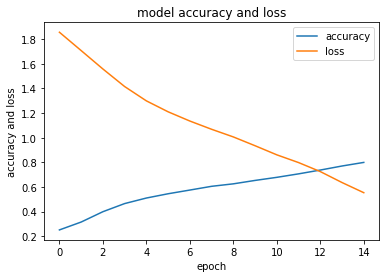

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

DenseNet121 model with Sobel filtered data

In [7]:
densenet_model = DenseNet121(weights='imagenet',include_top=False)

# Pooling/ flat
pooling = keras.layers.GlobalAveragePooling2D()(densenet_model.output)

# Adding fully connected layer 1
pred = keras.layers.Dense(7, activation='softmax', name="pred")(pooling)

# Final model
model = keras.models.Model(inputs = densenet_model.input, outputs=pred)

# Options setting
options = keras.optimizers.SGD(learning_rate = 0.001,decay=1e-6,momentum=0.9)

model.compile(optimizer=options, metrics=["accuracy"],loss='categorical_crossentropy')

# saving the best model
filepath="/content/drive/MyDrive/FER2013/sobel_filt_dense121.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# train the model
history = model.fit(train_data, train_labels, batch_size = 64, epochs = 15, shuffle=True, callbacks = callbacks_list, validation_data=(test_data, test_labels))

29097984/29084464 [==============================] - 0s 0us/step
Epoch 1/15
449/449 [==============================] - 389s 784ms/step - loss: 1.5933 - accuracy: 0.3958 - val_loss: 1.1310 - val_accuracy: 0.5758

Epoch 00001: val_accuracy improved from -inf to 0.57585, saving model to /content/drive/MyDrive/FER2013/rawdata_dense121.hdf5
Epoch 2/15
449/449 [==============================] - 336s 749ms/step - loss: 0.9523 - accuracy: 0.6523 - val_loss: 1.1839 - val_accuracy: 0.5719

Epoch 00002: val_accuracy did not improve from 0.57585
Epoch 3/15
449/449 [==============================] - 337s 750ms/step - loss: 0.6845 - accuracy: 0.7650 - val_loss: 1.1529 - val_accuracy: 0.5929

Epoch 00003: val_accuracy improved from 0.57585 to 0.59294, saving model to /content/drive/MyDrive/FER2013/rawdata_dense121.hdf5
Epoch 4/15
449/449 [==============================] - 336s 749ms/step - loss: 0.4342 - accuracy: 0.8712 - val_loss: 1.1677 - val_accuracy: 0.6051

Epoch 00004: val_accuracy improved fr

Accuracy and Loss curve for DenseNet121

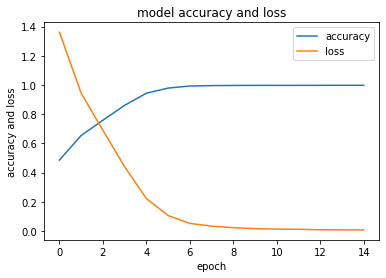

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

Ensemble Learning for Sobel filtered data (ResNet50 + VGG16 + DenseNet121)

In [6]:
from sklearn.metrics import accuracy_score

resnet_model = load_model("/content/drive/MyDrive/FER2013/sobel_filt_resnet50.hdf5")
vgg_model = load_model("/content/drive/MyDrive/FER2013/sobel_filt_vgg16.hdf5")
dense_model = load_model("/content/drive/MyDrive/FER2013/sobel_filt_dense121.hdf5")

sobel_dense = dense_model.predict(test_data)
sobel_vgg = vgg_model.predict(test_data)
sobel_resnet = resnet_model.predict(test_data)

averaged_preds = np.argmax(sobel_dense + sobel_vgg + sobel_resnet, 1)
real_labels = np.argmax(test_labels, 1)
acc = accuracy_score(real_labels, averaged_preds)
print(acc)

0.6635593220338983


Classification report and Confusion matrix for Sobel filtered data

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report :\n")
print(classification_report(real_labels, averaged_preds))

print("Confusion Matrix :\n")
print(confusion_matrix(real_labels, averaged_preds))

Classification Report :

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       860
           1       0.87      0.50      0.63       111
           2       0.56      0.47      0.51      1024
           3       0.83      0.88      0.86      1774
           4       0.59      0.65      0.62      1233
           5       0.53      0.54      0.53      1247
           6       0.80      0.77      0.79       831

    accuracy                           0.66      7080
   macro avg       0.68      0.63      0.64      7080
weighted avg       0.66      0.66      0.66      7080

Confusion Matrix :

[[ 495    4   85   37  109  116   14]
 [  28   55    7    5    5    9    2]
 [ 109    2  479   40  115  197   82]
 [  31    0   28 1556   83   50   26]
 [  64    2   69   83  802  199   14]
 [ 133    0  125   90  208  668   23]
 [  20    0   65   53   27   23  643]]
